In [2]:
# Import relevant libraries
import sys
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime



In [3]:
# Define Companies dict.
companies_dict={
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC', 
    'Boeing':'BA', 
    'Lockheed Martin':'LMT', 
    'McDonalds':'MCD', 
    'Intel':'INTC', 
    'Navistar':'NAV', 
    'IBM':'IBM', 
    'Texas Instruments':'TXN', 
    'MasterCard':'MA', 
    'Microsoft':'MSFT', 
    'General Electrics':'GE', 
    'Symantec':'SYMC', 
    'American Express':'AXP', 
    'Pepsi':'PEP', 
    'Coca Cola':'KO', 
    'Johnson & Johnson':'JNJ', 
    'Toyota':'TM', 
    'Honda':'HMC', 
    'Mistubishi':'MSBHY', 
    'Sony':'SNE', 
    'Exxon':'XOM', 
    'Chevron':'CVX', 
    'Valero Energy':'VLO', 
    'Ford':'F', 
    'Bank of America':'BAC'
}

In [74]:
companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [75]:
# stock market data is extracted from yahoo finance. Time period from 2020-01-03 to 2020-12-31
# stock market movements of companies would be compared based on these 6 parameters: 'High','Low','open','close','Volume','Adj close'
data_source='yahoo'
start_date='2020-01-03'
end_date='2020-12-31'
data1=data.DataReader(list(companies_dict.values()),data_source,start_date,end_date)


C:\Users\User\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning:

Failed to read symbol: 'SYMC', replacing with NaN.

C:\Users\User\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning:

Failed to read symbol: 'MSBHY', replacing with NaN.



In [76]:
print(data1)

Attributes    Adj Close                                                 \
Symbols            AMZN        AAPL        WBA         NOC          BA   
Date                                                                     
2020-01-02  1898.010010   74.444603  56.580986  349.809845  331.348572   
2020-01-03  1874.969971   73.720840  56.580986  368.800049  330.791901   
2020-01-06  1902.880005   74.308266  57.069412  369.606476  331.766083   
2020-01-07  1906.859985   73.958794  56.782104  368.760712  335.285156   
2020-01-08  1891.969971   75.148521  53.468460  364.158234  329.410095   
...                 ...         ...        ...         ...         ...   
2020-12-24  3172.689941  131.970001  39.619999  299.600006  217.149994   
2020-12-28  3283.959961  136.690002  39.660000  303.019989  216.089996   
2020-12-29  3322.000000  134.869995  39.410000  300.989990  216.250000   
2020-12-30  3285.850098  133.720001  39.340000  302.609985  216.669998   
2020-12-31  3256.929932  132.690002  3

In [77]:
#check null value
data1.isnull()
#data information
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-02 to 2020-12-31
Columns: 168 entries, ('Adj Close', 'AMZN') to ('Volume', 'MSBHY')
dtypes: float64(168)
memory usage: 334.0 KB
None


In [78]:
data1.describe()

Attributes    Adj Close                                                  \
Symbols            AMZN        AAPL         WBA         NOC          BA   
count        253.000000  253.000000  253.000000  253.000000  253.000000   
mean        2680.855096   95.043799   41.682869  323.717900  196.872512   
std          545.761043   21.954182    5.025663   23.037442   63.882502   
min         1676.609985   55.744217   33.126339  266.359161   95.010002   
25%         2149.870117   76.744728   38.690178  306.307037  156.350006   
50%         2890.300049   91.310051   40.566063  321.287231  174.419998   
75%         3165.120117  115.550644   43.550583  338.254120  218.779999   
max         3531.449951  136.690002   57.069412  378.496735  345.395020   

Attributes                                                              ...  \
Symbols            LMT         MCD        INTC         NAV         IBM  ...   
count       253.000000  253.000000  253.000000  253.000000  253.000000  ...   
mean        374.699818  198.376975   54.175976   32.770553  121.211899  ...   
std          26.043313   19.030432    6.043079    8.743439    9.686442  ...   
min         271.564148  134.599823   43.742031   15.300000   90.987846  ...   
25%         360.990021  184.139587   48.924149   26.090000  116.507080  ...   
50%         374.548584  204.076019   53.490936   32.259998  121.163612  ...   
75%         387.349945  212.318069   58.790211   43.000000  124.938332  ...   
max         428.837158  228.283173   66.808777   44.830002  149.111786  ...   

Attributes         Volume                                            \
Symbols                TM           HMC           SNE           XOM   
count          253.000000  2.530000e+02  2.530000e+02  2.530000e+02   
mean        213118.577075  7.850644e+05  1.231321e+06  2.881376e+07   
std         105906.037695  4.873204e+05  5.531724e+05  1.282051e+07   
min          59900.000000  2.097000e+05  3.018000e+05  8.039000e+06   
25%         139200.000000  4.743000e+05  8.485000e+05  1.925160e+07   
50%         184200.000000  6.636000e+05  1.113400e+06  2.652110e+07   
75%         251600.000000  9.436000e+05  1.461500e+06  3.357940e+07   
max         743300.000000  3.942500e+06  3.626500e+06  7.989150e+07   

Attributes                                                                     
Symbols              CVX           VLO             F           BAC SYMC MSBHY  
count       2.530000e+02  2.530000e+02  2.530000e+02  2.530000e+02  0.0   0.0  
mean        1.120124e+07  4.989043e+06  7.671481e+07  6.805145e+07  NaN   NaN  
std         5.054819e+06  2.204764e+06  2.997767e+07  3.019636e+07  NaN   NaN  
min         3.335600e+06  1.352000e+06  2.785390e+07  2.263230e+07  NaN   NaN  
25%         7.609800e+06  3.624200e+06  5.629670e+07  4.810700e+07  NaN   NaN  
50%         9.892900e+06  4.594200e+06  7.107940e+07  5.828400e+07  NaN   NaN  
75%         1.369960e+07  5.692800e+06  9.246950e+07  7.959850e+07  NaN   NaN  
max         3.059550e+07  1.921160e+07  2.318008e+08  1.818985e+08  NaN   NaN  

[8 rows x 168 columns]

In [79]:
type(data1)

pandas.core.frame.DataFrame

In [85]:
#data1.drop(["MSBHY"], axis=1,level=1,inplace=True)
data1.drop(['SYMC'],axis=1,level=1,inplace=True)


In [86]:
data1.head(10)

Attributes    Adj Close                                                \
Symbols            AMZN       AAPL        WBA         NOC          BA   
Date                                                                    
2020-01-02  1898.010010  74.444603  56.580986  349.809845  331.348572   
2020-01-03  1874.969971  73.720840  56.580986  368.800049  330.791901   
2020-01-06  1902.880005  74.308266  57.069412  369.606476  331.766083   
2020-01-07  1906.859985  73.958794  56.782104  368.760712  335.285156   
2020-01-08  1891.969971  75.148521  53.468460  364.158234  329.410095   
2020-01-09  1901.050049  76.744728  52.367096  366.193909  334.350708   
2020-01-10  1883.160034  76.918221  51.926563  368.190308  327.968689   
2020-01-13  1891.300049  78.561531  51.773327  370.589874  328.266907   
2020-01-14  1869.439941  77.500702  52.309635  368.465698  330.384308   
2020-01-15  1862.020020  77.168564  52.127674  373.963104  327.849396   

Attributes                                                            ...  \
Symbols            LMT         MCD       INTC        NAV         IBM  ...   
Date                                                                  ...   
2020-01-02  389.370636  195.902405  59.363903  28.540001  128.671951  ...   
2020-01-03  403.380829  195.209702  58.641853  28.240000  127.645760  ...   
2020-01-06  402.766632  197.404922  58.475975  27.940001  127.417740  ...   
2020-01-07  404.121796  197.697632  57.500240  27.850000  127.503242  ...   
2020-01-08  400.738678  200.897781  57.539272  28.010000  128.567429  ...   
2020-01-09  404.541046  203.278381  57.861263  27.980000  129.926178  ...   
2020-01-10  403.468567  202.224686  57.509998  27.400000  129.878662  ...   
2020-01-13  408.528625  201.483170  58.144230  26.930000  129.793167  ...   
2020-01-14  405.720764  202.273468  57.988113  27.379999  129.052017  ...   
2020-01-15  410.410309  204.663834  57.509998  26.990000  129.812149  ...   

Attributes      Volume                                                        \
Symbols             KO        JNJ        TM       HMC        SNE         XOM   
Date                                                                           
2020-01-02  11867700.0  5777000.0  118100.0  262800.0   856500.0  12456400.0   
2020-01-03  11354500.0  5752400.0  174900.0  663600.0   518600.0  17386900.0   
2020-01-06  14698300.0  7731300.0  150200.0  463000.0   755500.0  20081900.0   
2020-01-07   9973900.0  7382900.0  123500.0  341800.0  1316200.0  17387700.0   
2020-01-08  10676000.0  6605800.0  117700.0  264200.0  1640200.0  15137700.0   
2020-01-09  15398000.0  6112700.0  116200.0  414700.0  2377300.0  14811800.0   
2020-01-10  13040100.0  5042600.0  172000.0  343600.0  1120500.0  11995600.0   
2020-01-13  14302900.0  4593200.0  114100.0  376000.0  1272300.0   9953900.0   
2020-01-14  16345300.0  7037500.0  109400.0  407400.0  1940800.0  16261000.0   
2020-01-15  17735400.0  4960300.0  138200.0  430600.0  1085900.0  11390300.0   

Attributes                                                
Symbols           CVX        VLO           F         BAC  
Date                                                      
2020-01-02  5205000.0  2130500.0  43425700.0  37614200.0  
2020-01-03  6360900.0  5057000.0  45040800.0  50357900.0  
2020-01-06  9953000.0  3393200.0  43372300.0  42185000.0  
2020-01-07  7856900.0  3795500.0  44984100.0  34149000.0  
2020-01-08  7295900.0  4101800.0  45994900.0  45311600.0  
2020-01-09  7345300.0  3033300.0  51817400.0  39861600.0  
2020-01-10  6393800.0  3551800.0  39796300.0  39730400.0  
2020-01-13  6846700.0  2703100.0  48553700.0  37956100.0  
2020-01-14  7189100.0  3270900.0  42935600.0  66719300.0  
2020-01-15  5808800.0  4001900.0  55923900.0  74745500.0  

[10 rows x 156 columns]

In [87]:
# finding stock open and stock close
stock_open=np.array(data1['Open']).T
stock_close=np.array(data1['Close']).T  # T: transpose of data

In [88]:
#define movement: which is difference between Opening and closing price. Positve movement stands fo buy and negative stand for sell
movements=stock_close-stock_open

In [89]:
#Find sum of movemenents : Its define as sum of difference of closing and opening price of all days

sum_of_movements=np.sum(movements,1)
for i in range(0,len(companies_dict)):
    
    try:
        print("")
    except IndexError:
        pass
    print("company:{},change: {}".format(data1['High'].columns[i],sum_of_movements[i]))


company:AMZN,change: -37.7210693359375

company:AAPL,change: 20.089900970458984

company:WBA,change: -8.780040740966797

company:NOC,change: -50.6697998046875

company:BA,change: -252.5400161743164

company:LMT,change: -72.8797607421875

company:MCD,change: 25.690216064453125

company:INTC,change: 6.959972381591797

company:NAV,change: -12.990006446838379

company:IBM,change: -7.24005126953125

company:TXN,change: 19.860069274902344

company:MA,change: -35.29954528808594

company:MSFT,change: 29.32000732421875

company:GE,change: -5.64999532699585

company:AXP,change: -15.679901123046875

company:PEP,change: 14.610031127929688

company:KO,change: -12.35000991821289

company:JNJ,change: -6.1299591064453125

company:TM,change: -27.309959411621094

company:HMC,change: -4.210004806518555

company:SNE,change: -8.249992370605469

company:XOM,change: -36.27995300292969

company:CVX,change: -32.509979248046875

company:VLO,change: -39.93001174926758

company:F,change: -5.060001850128174

comp

IndexError: index 26 is out of bounds for axis 0 with size 26

In [90]:
companies_dict

{'Amazon': 'AMZN',
 'Apple': 'AAPL',
 'Walgreen': 'WBA',
 'Northrop Grumman': 'NOC',
 'Boeing': 'BA',
 'Lockheed Martin': 'LMT',
 'McDonalds': 'MCD',
 'Intel': 'INTC',
 'Navistar': 'NAV',
 'IBM': 'IBM',
 'Texas Instruments': 'TXN',
 'MasterCard': 'MA',
 'Microsoft': 'MSFT',
 'General Electrics': 'GE',
 'Symantec': 'SYMC',
 'American Express': 'AXP',
 'Pepsi': 'PEP',
 'Coca Cola': 'KO',
 'Johnson & Johnson': 'JNJ',
 'Toyota': 'TM',
 'Honda': 'HMC',
 'Mistubishi': 'MSBHY',
 'Sony': 'SNE',
 'Exxon': 'XOM',
 'Chevron': 'CVX',
 'Valero Energy': 'VLO',
 'Ford': 'F',
 'Bank of America': 'BAC'}

In [91]:
#Above positive sum_of_movements is available to go for buy and negitive sum_of_movements is advisable to sell
#data visulization

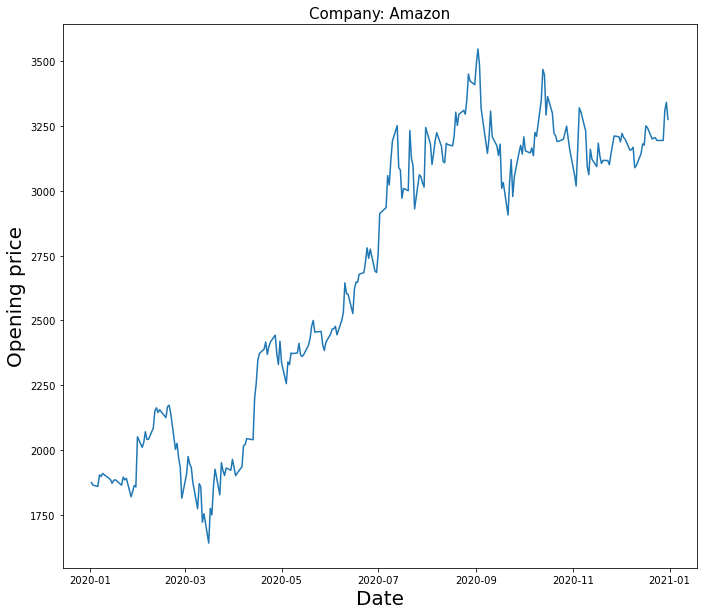

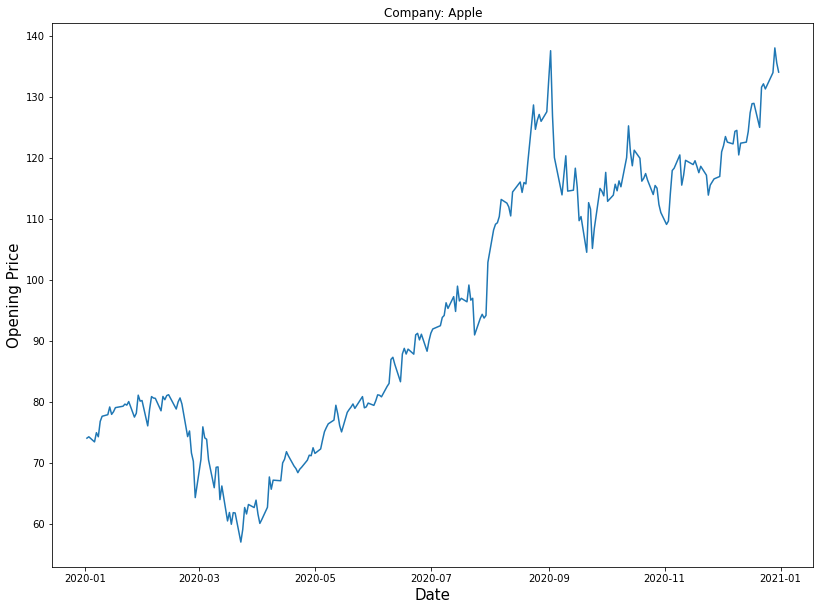

In [92]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.plot(data1['Open']['AMZN'])
plt.title('Company: Amazon', fontsize=15)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Opening price', fontsize=20)

plt.show()
plt.figure(figsize=(30,10))
plt.subplot(1,2,2)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Opening Price', fontsize=15)
plt.title('Company: Apple')
plt.plot(data1['Open']['AAPL'])
plt.show()

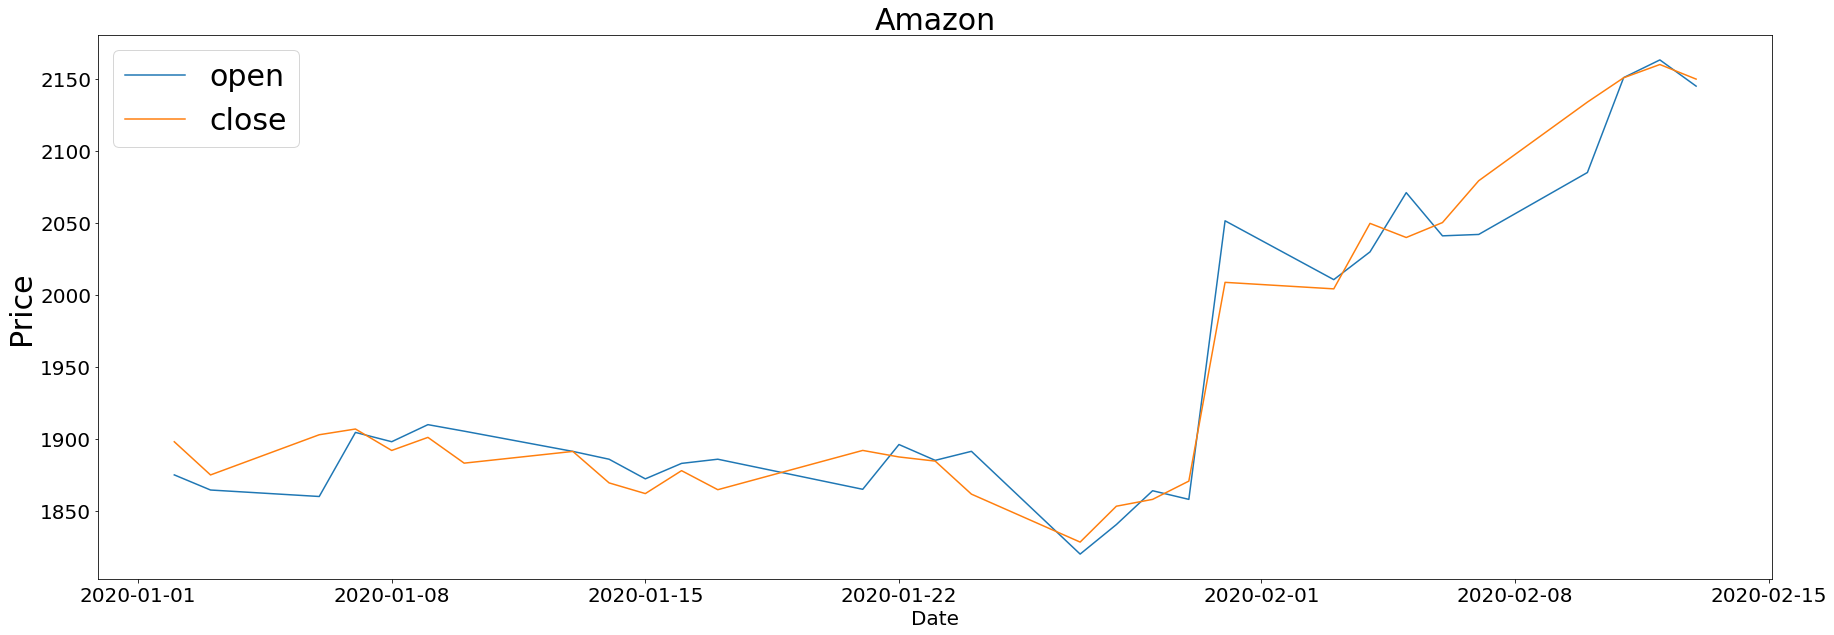

In [93]:
#plot the opening and closing price of amazon in period from 2020-01-01 to 2020-1-30
plt.figure(figsize=(30,10))
plt.title("Amazon", fontsize=30)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Price", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(data1.iloc[:30]['Open']['AMZN'], label='open')
plt.plot(data1.iloc[:30]['Close']['AMZN'],label='close')
plt.legend(fontsize=30)
plt.show()

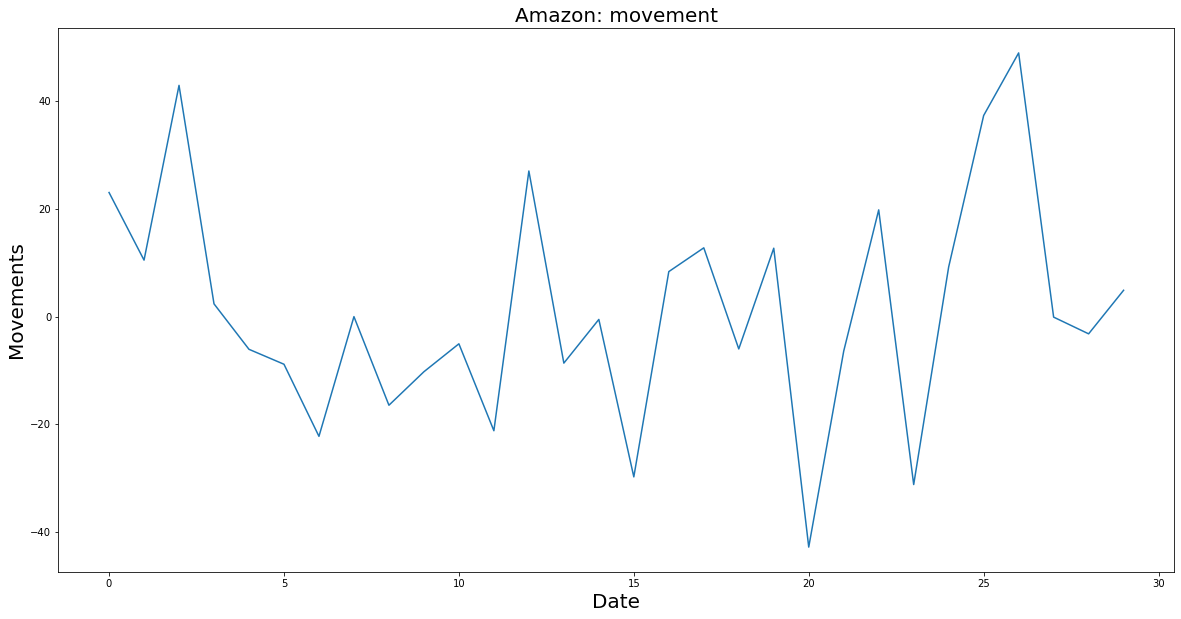

In [94]:

#Find the variation of movement of amazon in the time period from 2020-01-01 to 2020-1-30
plt.figure(figsize=(20,10))
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movements', fontsize=20)
plt.title('Amazon: movement',fontsize=20)
plt.plot(movements[0][0:30])


# Positive movement is desirable which showed price has increased during the day

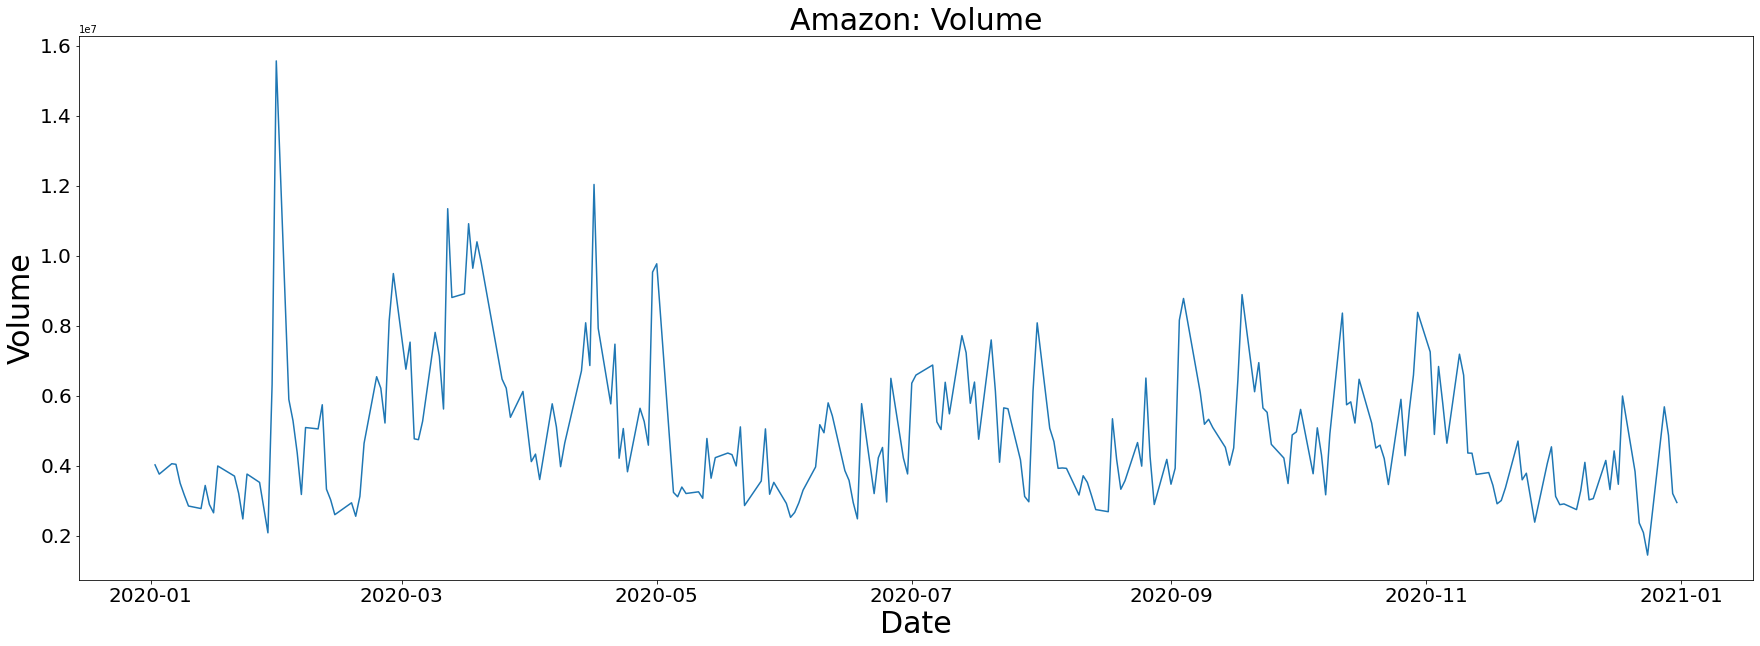

In [95]:
#Find the volume of the stocks traded in the time period from 2020-01-03 to 2020-12-31
plt.figure(figsize=(30,10))
plt.xlabel('Date', fontsize=30)
plt.ylabel('Volume', fontsize=30)
plt.title("Amazon: Volume", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(data1['Volume']['AMZN'], label='Open')
#plt.plot(data1['Volume']['AAPL'], label='Open')
plt.show()

#the peaks suggest there are higher volume of stocks traded on certain days.

In [96]:
#candlestick plot for first 60days
import plotly.graph_objects as go
plot=go.Figure(data=[go.Candlestick(x=data1.index, open=data1.iloc[0:60]['Open']['AMZN'], high=data1.iloc[0:60]['High']['AMZN'], low=data1.iloc[0:30]['Low']['AMZN'],close=data1.iloc[0:60]['Close']['AMZN'])])
plot.show()

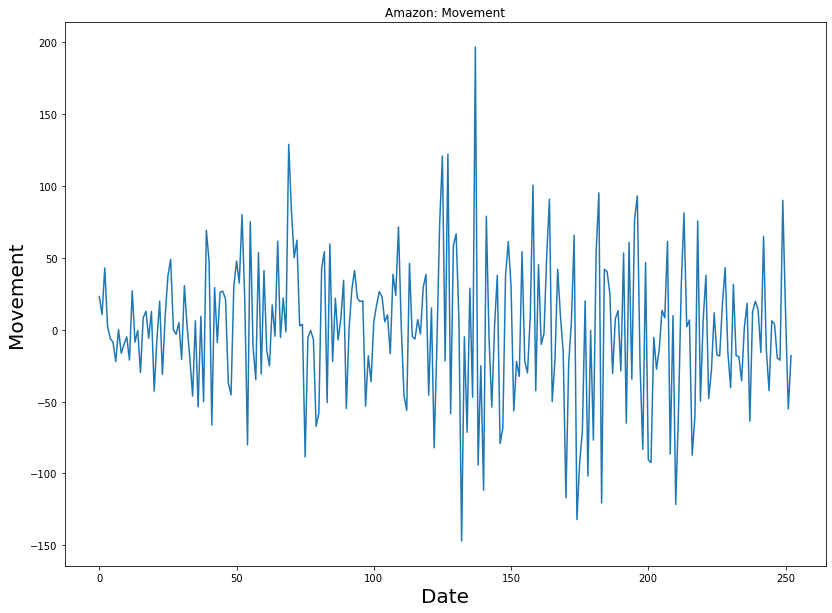

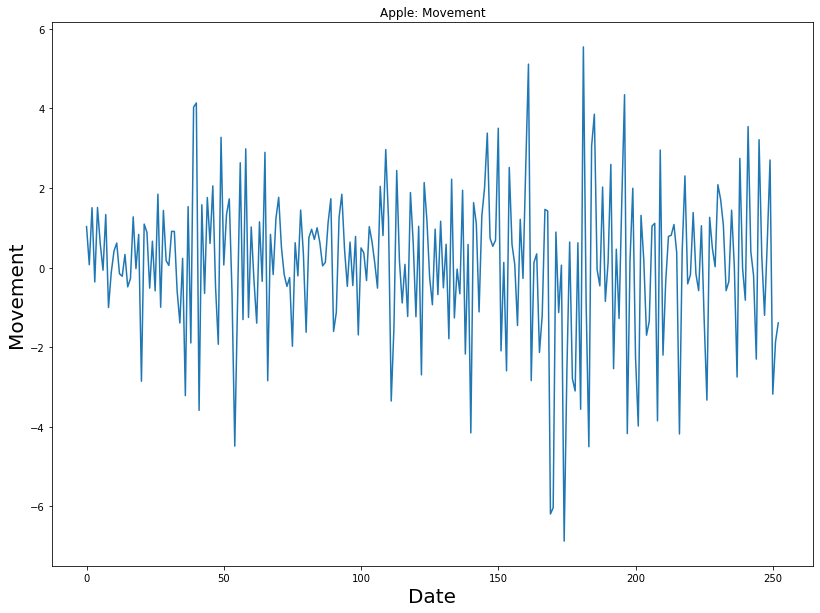

In [97]:
#Normalization 
#variation of movement of amazon and apple
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement',fontsize=20)
plt.title('Amazon: Movement')
plt.plot(movements[0])
plt.show()
plt.figure(figsize=(30,10))
plt.subplot(1,2,2)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement',fontsize=20)
plt.title('Apple: Movement')

plt.plot(movements[1])
plt.show()

In [98]:
from sklearn.preprocessing import Normalizer
normalizer=Normalizer()
norm_movements=normalizer.fit_transform(movements)

In [99]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())
# all values are in range (-1,1) and mean is close to 0.


-0.5698026974006677
0.33509889947166854
-0.0024660283585683307


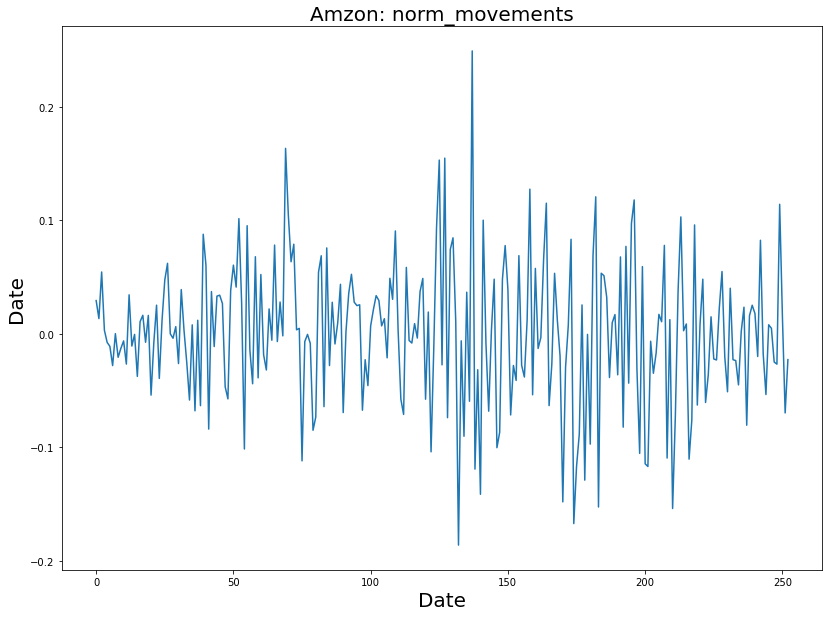

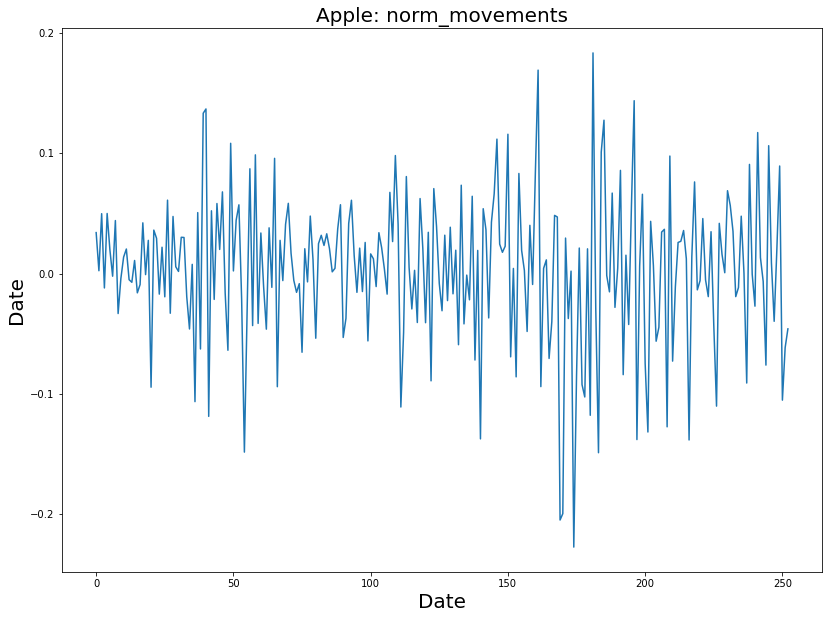

In [100]:
#Now plot the variation of norm_movements of amazon and apple
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Date', fontsize=20)
plt.title('Amzon: norm_movements', fontsize=20)
plt.plot(norm_movements[0])
#plt.show()

plt.figure(figsize=(30,10))
plt.subplot(1,2,2)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Date', fontsize=20)
plt.title('Apple: norm_movements', fontsize=20)
plt.plot(norm_movements[1])
plt.show()

#normalized movements of amazon and apple are in similar range

In [101]:
#import the necessary package
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

In [102]:
#define normalizer
normalizer=Normalizer()
# create Kmean model
Kmeans=KMeans(n_clusters=10, max_iter=1000)
#make pipeline chaining normalizer and kmeans
pipeline=make_pipeline(normalizer, Kmeans)
#fit pipeline daily stock movemennts
pipeline.fit(movements)
labels=pipeline.predict(movements)


In [153]:
#The companies and their cluster number is prinetd
a={'labels': labels, 'companies':companies}
data2=pd.DataFrame.from_dict(a,orient='index')
data2.transpose()

,labels,companies
0,0,"(Apple, AAPL)"
1,0,"(Amazon, AMZN)"
2,6,"(American Express, AXP)"
3,4,"(Boeing, BA)"
4,2,"(Bank of America, BAC)"
5,4,"(Chevron, CVX)"
6,1,"(Ford, F)"
7,5,"(General Electrics, GE)"
8,7,"(Honda, HMC)"
9,1,"(IBM, IBM)"


No handles with labels found to put in legend.


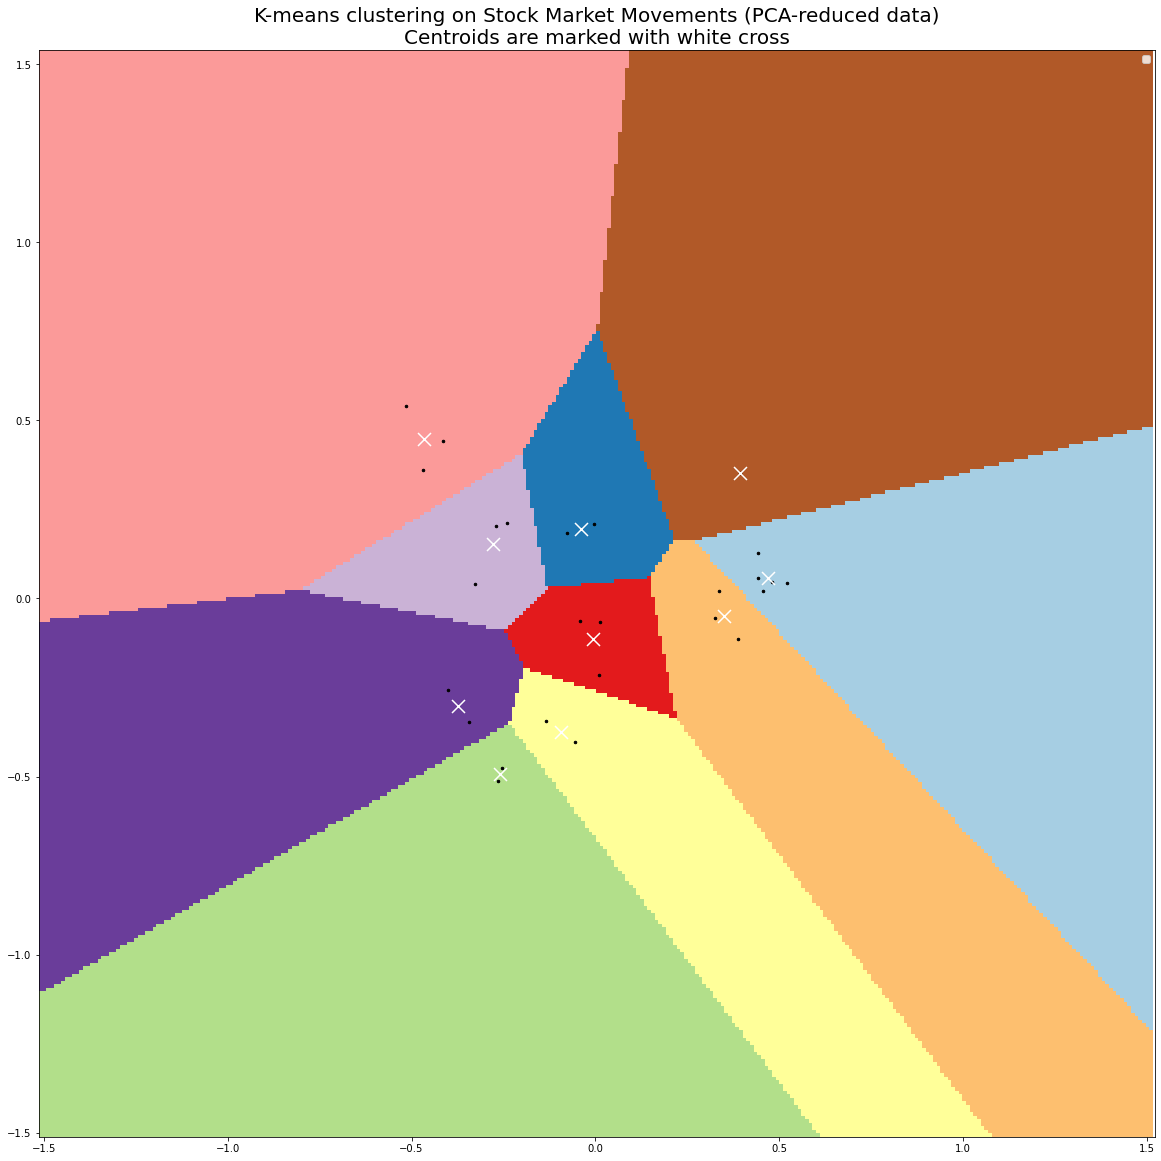

In [162]:
from sklearn.decomposition import PCA

# Visualize the results on PCA-reduced data
# Principal component analysis (PCA)
# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space

reduced_data = PCA(n_components=2).fit_transform(norm_movements)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# Create a DataFrame aligning labels and companies: df
a={'labels': labels, 'companies':companies}
data2=pd.DataFrame.from_dict(a,orient='index')
data2.transpose()
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     
# point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define Colormap
cmap = plt.cm.Paired

plt.figure(figsize=(20,20))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on Stock Market Movements (PCA-reduced data)\n'
          'Centroids are marked with white cross',fontsize=20)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.show()